In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import kstest

z_thresh = 4
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"

In [5]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [3]:
def find_max_column(arr):
    # Find the column index of the global maximum value in the flattened array
    global_max_index = np.argmax(arr)

    # Convert the flattened index to row and column indices
    row_index, global_max_column_index = np.unravel_index(global_max_index, arr.shape)

    return global_max_column_index

In [6]:
# Load all required files for the psilocybin recording day

# saline_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-028/suite2p/plane0/cells.pkl"
# psilo_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-029/suite2p/plane0/cells.pkl"
saline_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-026/suite2p/plane0/cells.pkl"
psilo_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-027/suite2p/plane0/cells.pkl"

saline_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-033/suite2p/plane0/cells.pkl"
psilo_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-034/suite2p/plane0/cells.pkl"

saline_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-042/suite2p/plane0/cells.pkl"
psilo_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-043/suite2p/plane0/cells.pkl"

saline_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-044/suite2p/plane0/cells.pkl"
psilo_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-045/suite2p/plane0/cells.pkl"

saline_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-065/suite2p/plane0/cells.pkl"
psilo_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-066/suite2p/plane0/cells.pkl"

saline_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"
psilo_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-064/suite2p/plane0/cells.pkl"

saline_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-139/suite2p/plane0/cells.pkl"
psilo_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-140/suite2p/plane0/cells.pkl"

saline_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-142/suite2p/plane0/cells.pkl"
psilo_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-143/suite2p/plane0/cells.pkl"

all_dicts_saline = [saline_186,saline_237,saline_239,saline_251,saline_269,saline_276,saline_473,saline_474]
all_dicts_psilo = [psilo_186,psilo_237,psilo_239,psilo_251,psilo_269,psilo_276,psilo_473,psilo_474]
all_dicts_saline_str = ["saline_186","saline_237","saline_239","saline_251","saline_269","saline_276","saline_473","saline_474"]
all_dicts_psilo_str = ["psilo_186","psilo_237","psilo_239","psilo_251","psilo_269","psilo_276","psilo_473","psilo_474"]
saline_dict ={}
psilo_dict = {}

for file in all_dicts_saline_str:
    saline_dict[file]=None

for file in all_dicts_psilo_str:
    psilo_dict[file] = None


zippedsaline = zip(all_dicts_saline, all_dicts_saline_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict[v] = pickle.load(f)


zippedpsilo = zip(all_dicts_psilo, all_dicts_psilo_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        psilo_dict[v] = pickle.load(f)

In [7]:
cell_list_1 = list(saline_dict[all_dicts_saline_str[0]].keys())
dict_keys = list(saline_dict.keys())

nfreq = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['saline_186', 'saline_237', 'saline_239', 'saline_251', 'saline_269', 'saline_276', 'saline_473', 'saline_474']


In [8]:
# Create an array of all the matched cells that are sound-responsive in both recordings.  Each row is a matched cell pair. 

def get_coactive_cells(dict_1,dict_2,PRE,POST):

    matched_responsive_1 = []
    matched_responsive_2 = []

    # matched_cells = dict_1[PRE][next(iter(dict_1[PRE]))]['matched_cells']
    matched_cells = dict_2[POST][next(iter(dict_2[POST]))]['matched_cells']

    # if len(matched_cells) != len(matched_cells_2):
    #     print("You have two different matched cells arrays here!")
    
    # else:

    for cell in dict_1[PRE]:
            if cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == True:
                matched_responsive_1.append(cell)

    for cell in dict_2[POST]:
            if cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == True:
                matched_responsive_2.append(cell)

    indices = np.where(np.isin(matched_cells[:, 0], matched_responsive_1))

        # Find the indices where the values in column 1 appear in 'sublist_col1'
    indices_col1 = np.isin(matched_cells[:, 0], matched_responsive_1)

        # Find the indices where the values in column 2 appear in 'sublist_col2'
    indices_col2 = np.isin(matched_cells[:, 1], matched_responsive_2)

        # Combine the two conditions using logical AND
    combined_indices = np.logical_and(indices_col1, indices_col2)

        # Extract the rows where both conditions are true
    coactive = matched_cells[combined_indices]

    return coactive


In [9]:
def BF_percent_changed(coactive,shift_range,dict_1,dict_2,PRE,POST):

    same_place_counter = 0
    not_same_counter = 0

    for i, cell_1, cell_2 in zip(range(len(coactive)), coactive[:,0], coactive[:,1]):
        tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
        tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']
            
        BF_column = find_max_column(tuning_array_1)
        BF_pre = tuning_array_1[:, BF_column]
        BF_post = tuning_array_2[:, BF_column]

        max_value_index1 = np.argmax(BF_pre)
        max_value_index2 = np.argmax(BF_post)
        BF_shift = abs(max_value_index1 - max_value_index2)

        if max_value_index1 == max_value_index2:
            same_place_counter += 1
        elif BF_shift <= shift_range and max_value_index1 != np.argmax(BF_post):
            same_place_counter += 1
        else:
            not_same_counter += 1

    percent_shifted = (not_same_counter / len(coactive)) * 100

    return not_same_counter

In [10]:
def get_BF_shifts(coactive,dict_1,dict_2,PRE,POST):

    BF_shift_array = np.zeros_like(coactive[:,0])

    for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
        tuning_array_1 = dict_1[PRE][cell_1]['tuning']
        tuning_array_2 = dict_2[POST][cell_2]['tuning']
        
        BF_column = find_max_column(tuning_array_1)

        BF_pre = tuning_array_1[:,BF_column]

        BF_post = tuning_array_2[:,BF_column]

        max_value_index1 = np.argmax(BF_pre)

        max_value_index2 = np.argmax(BF_post)

        BF_shift = max_value_index1 - max_value_index2

        BF_shift_array[i] = BF_shift

    return BF_shift_array


In [11]:
def get_PI_shifts(coactive,dict_1,dict_2,PRE,POST):

        PI_shift_array = np.zeros_like(coactive[:,0])

        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['tuning']
                tuning_array_2 = dict_2[POST][cell_2]['tuning']

                PI_column_1 = find_max_column(tuning_array_1)
                PI_column_2 = find_max_column(tuning_array_2)

                PI_shift = PI_column_2 - PI_column_1

                PI_shift_array[i] = PI_shift

        return PI_shift_array


In [12]:
def convert_to_octaves(BF_shifts):
    # Convert input array to floating point to preserve fractional values
    BF_shifts_float = BF_shifts.astype(float)
    
    # Create a mask for non-zero values
    non_zero_mask = BF_shifts_float != 0

    # Divide non-zero values by two and convert them to floats
    BF_shifts_octaves = BF_shifts_float.copy()  # Create a copy of the input array
    BF_shifts_octaves[non_zero_mask] /= 2.0
    
    return BF_shifts_octaves


In [13]:
def calculate_relative_frequencies(values, unique_values):
    total_values = len(values)
    frequencies = np.array([np.sum(values == value) / total_values for value in unique_values])
    return frequencies

def plot_comparison(values_set1, values_set2):
    # Calculate unique values for each set
    unique_values_set1 = np.unique(values_set1)
    unique_values_set2 = np.unique(values_set2)
    
    # Combine unique values from both sets
    unique_values = np.unique(np.concatenate((unique_values_set1, unique_values_set2)))

    # Halve the unique values except for 0
    halved_unique_values = [value / 2 if value != 0 else 0 for value in unique_values]

    # Calculate relative frequencies for each set based on the unique values
    rel_freq_set1 = calculate_relative_frequencies(values_set1, unique_values)
    rel_freq_set2 = calculate_relative_frequencies(values_set2, unique_values)

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(unique_values))
    r2 = [x + bar_width for x in r1]

    # Create the bar plot
    plt.bar(r1, rel_freq_set1, color='blue', width=bar_width, edgecolor='black', label='Pre-Psilocybin')
    plt.bar(r2, rel_freq_set2, color='orange', width=bar_width, edgecolor='black', label='Post-Psilocybin')

    # Add labels and title
    plt.xlabel('Bandwidth (Octaves)')
    plt.ylabel('Probability')
    plt.title('Bandwidth at 50 dB, Pre- and Post-Psilocybin')

    # Set the modified x tick labels
    plt.xticks([r + bar_width / 2 for r in range(len(unique_values))], halved_unique_values)

    # Add legend
    plt.legend()
    plt.tight_layout()

    # Show plot
    plt.show()


In [14]:
BF_shift_saline_neg = np.load(filepath + 'BF_shifts_saline_neg.npy')
BF_shift_psilocybin_neg = np.load(filepath + 'BF_shifts_psilocybin_neg.npy')

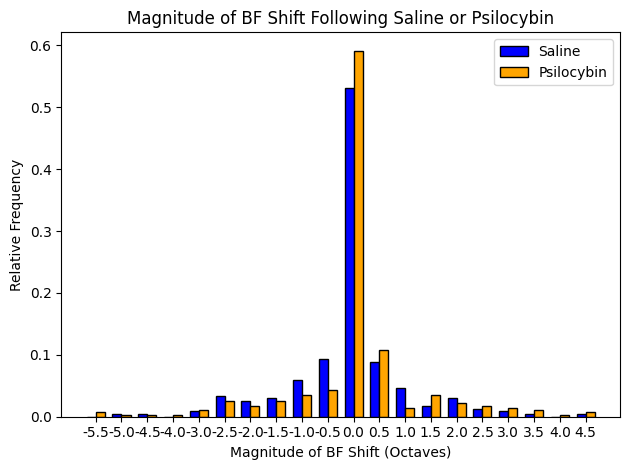

In [71]:
# Example data
values_set1 = convert_to_octaves(BF_shift_saline_neg)
values_set2 = convert_to_octaves(BF_shift_psilocybin_neg)

plot_comparison(values_set1, values_set2)

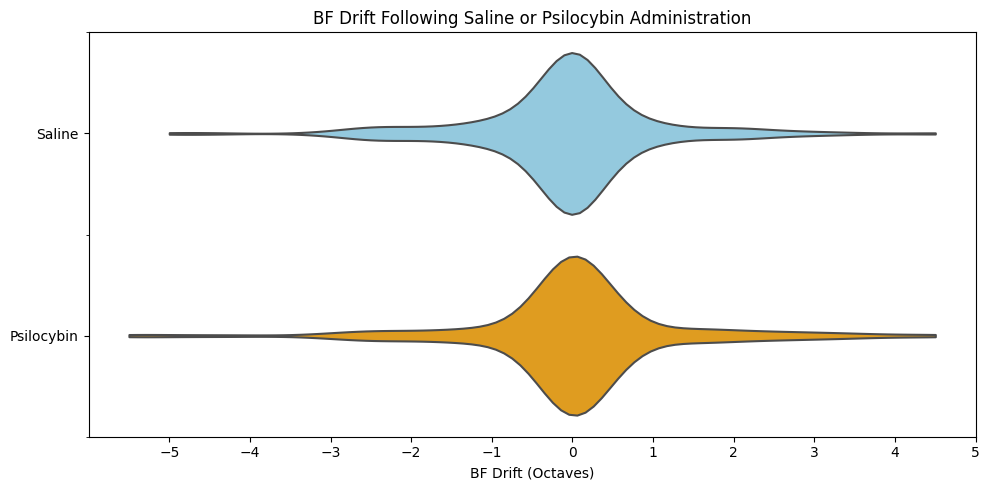

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


# Example data
values_set1 = convert_to_octaves(BF_shift_saline_neg)
values_set2 = convert_to_octaves(BF_shift_psilocybin_neg)

# Concatenate the data from both datasets
combined_values = [values_set1, values_set2]

# Create a single violin plot for both datasets
plt.figure(figsize=(10, 5))

# Use hue parameter to differentiate between the two datasets
sns.violinplot(data=combined_values, palette=['skyblue', 'orange'], cut=0, orient='h', inner=None)

# Set y-ticks manually to include additional intermediate ticks
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))

# Set y-labels
plt.yticks([0, 1], ['Saline', 'Psilocybin'])

# Set x-ticks manually to increase in intervals of 1
plt.xticks(np.arange(-5, 6, 1))

# Set title and labels
plt.title('BF Drift Following Saline or Psilocybin Administration')
plt.xlabel('BF Drift (Octaves)')
plt.ylabel('')

# Show plot
plt.tight_layout()
plt.show()

In [87]:
# Define your array of values ranging from -5 to 5, in increments of 0.5
values_array = BF_shift_saline_neg

# Create a mask for values that are not between and inclusive of -1 and 1
mask = (values_array < -1) | (values_array > 1)

# Calculate the percentage of values that satisfy the condition
percentage_not_between_minus_one_and_one = np.mean(mask) * 100

print("Percentage of values not between and inclusive of -1 and 1:", percentage_not_between_minus_one_and_one, "%")

Percentage of values not between and inclusive of -1 and 1: 28.691983122362867 %


In [5]:
PI_shift_saline_neg = np.load(filepath + 'PI_shifts_saline_neg.npy')
PI_shift_psilocybin_neg = np.load(filepath + 'PI_shifts_psilocybin_neg.npy')

In [3]:
def get_counts(BF_list):
    counts = Counter(BF_list)
    keys = list(counts.keys())
    keys = sorted(keys)
    counts_sorted = {i: counts[i] for i in keys}
    counts_sorted_density = {k: v / len(BF_list) for k, v in counts_sorted.items()}

    return counts_sorted_density

In [19]:
def plot_counts(pre_dict,post_dict,label_pre,label_post):
    x = pre_dict.keys()

    y1 = list(pre_dict.values())
    y2 = list(post_dict.values())

    n=7
    r = np.arange(n)
    width = 0.25
    labels = ['-30', '-20', '-10', '0', '+10', '+20', '+30']

    plt.bar(r, y1, color = 'b', 
        width = width, edgecolor = 'black', 
        label=label_pre) 
    plt.bar(r + width, y2, color = 'orange', 
        width = width, edgecolor = 'black', 
        label=label_post) 
  

    
    plt.xticks(r + width/2,labels,rotation=45,fontsize=13) 

    # plt.title("Change in Preferred Intensity, Saline vs Psilocybin Conditions",pad=10)
    plt.ylabel("Probability",fontsize=15,labelpad=10)
    plt.xlabel("Change in Preferred Intensity (dB)",fontsize=15,labelpad=10)

    plt.legend() 
    plt.tight_layout  
    plt.show() 

In [7]:
from collections import Counter

PI_shift_saline_counts = get_counts(PI_shift_saline_neg)
PI_shift_psilo_counts = get_counts(PI_shift_psilocybin_neg)


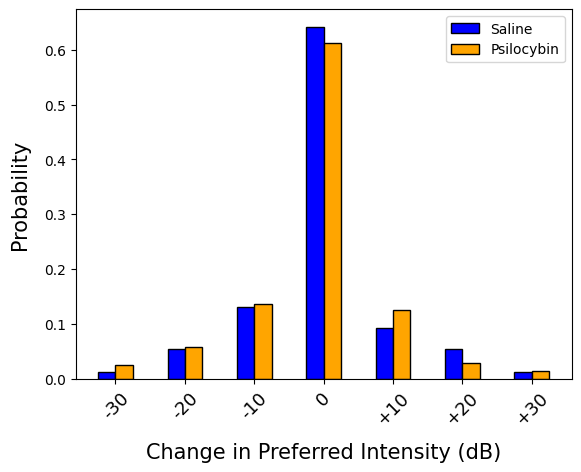

In [20]:
plot_counts(PI_shift_saline_counts,PI_shift_psilo_counts,'Saline','Psilocybin')

In [52]:
def percentage_unchanged(data):
    # Count non-zero values
    non_zero_count = np.count_nonzero(data)

    # Calculate percentage
    percentage_non_zero = (non_zero_count / len(data)) * 100

    return percentage_non_zero

print(percentage_unchanged(values_set2))

In [61]:
def get_lowest_response_intensity(coactive,dict_1,dict_2,PRE,POST):

        lowest_response_intensity = np.zeros_like(coactive)

        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
                tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']

                for j in range(len(nInt)):
                        if any(y > z_thresh for y in tuning_array_1[0:,j]): 
                                lowest_response_intensity[i,0] = float(j)
                                break
                        else:
                                continue
                
                for j in range(len(nInt)):
                        if any(y > z_thresh for y in tuning_array_2[0:,j]): 
                                lowest_response_intensity[i,1] = float(j)
                                break
                        else:
                                continue
                        

        return lowest_response_intensity


In [152]:
lowest_response_intensity_all_con = np.concatenate(lowest_response_intensity_all)

In [153]:
lowest_response_matched_post_saline = np.load(filepath + 'lowest_response_matched_post_saline.npy')

In [150]:
diff_lowest_intensity_saline = lowest_response_matched_post_saline[:,1] - lowest_response_matched_post_saline[:,0]
print(diff_lowest_intensity_saline)

diff_lowest_intensity_psilo = lowest_response_intensity_all_con[:,1] - lowest_response_intensity_all_con[:,0]
print(diff_lowest_intensity_psilo)

[ 0  0  0  0  0 -1  2  0 -3 -1  3 -1  0 -1  0  0  0  0 -3  2  0  0  0 -1
 -1  0  0  0  1  0  0  0  0  3  0 -2 -2  0  1  0  1  0  0  0  1 -2  2 -1
  2  1  0  0  0  0  0  0  0  1 -3  0  0  0 -1 -1 -3  0  2  0  0  0 -1  0
  1  0  0  3  0  0 -3  0  0  1  0  0  0  0  1 -2  0  1 -2  2  0  3  2  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  1  0  2  1  0  0 -3  0  0
 -1 -2  0  0  0  0 -1  0  0  1  2  2  3  2  0  1 -1 -1  0 -3 -3  0 -3  0
  0  2  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  2 -2  0  2  0  0  0
  0 -2  0  0  0  0  1  0 -1  0  0  1  0  0 -2  0 -1  0  2  0  0  0  0  0
  3  0  0  0  0  3  0 -3  1  0  0 -1  3  2  0  0  1  0  3  0  0  1  0  1
  0 -1  0 -2  0  0  0  0  0  2  3  0  0  0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  2  0 -1  0  0  0 -1  0  0  0  1 -1 -1  0 -1 -1  0  0  0
  0  0  0  0  0 -2  0  0 -1 -1  0 -1  3  0  0  3  0  1  0  0  0  0  0  0
  0  0  0  0  2  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0 -2  0  0  0
  0 -1  1  0 -2  0  0  0  0  0 -3  0 -2  0  0  0  0 -1  0 -

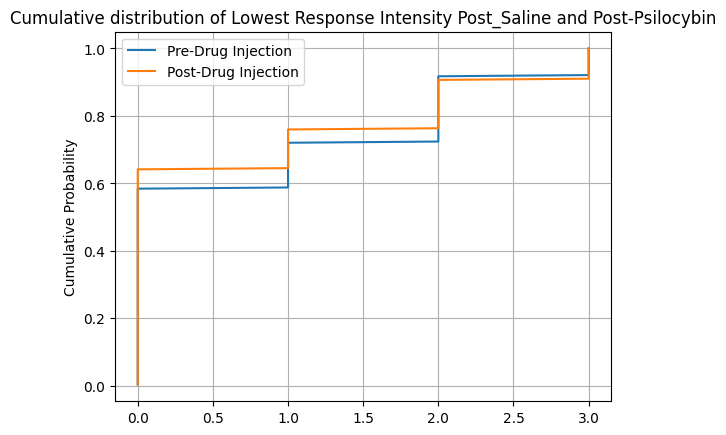

In [156]:
# Calculate CDFs
pre_amplitudes = lowest_response_intensity_all_con[:,0]
post_amplitudes = lowest_response_intensity_all_con[:,1]


pre_sorted = np.sort(pre_amplitudes)
pre_cdf = np.arange(1, len(pre_sorted) + 1) / len(pre_sorted)

post_sorted = np.sort(post_amplitudes)
post_cdf = np.arange(1, len(post_sorted) + 1) / len(post_sorted)

# Plot CDFs
plt.plot(pre_sorted, pre_cdf, label='Pre-Drug Injection')
plt.plot(post_sorted, post_cdf, label='Post-Drug Injection')

# Add labels and legend
plt.xlabel('')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative distribution of Lowest Response Intensity Post_Saline and Post-Psilocybin')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [157]:
# Perform KS test between two samples
ks_statistic, p_value = kstest(pre_amplitudes,post_amplitudes)

# Print test results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.05734767025089606
P-value: 0.7495347702679928


In [158]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(pre_amplitudes, post_amplitudes)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 40923.0
P-value: 0.22841927907212278


In [91]:
def plot_cdf(data):
    # Define your series
    s = pd.Series(data, name = 'value')
    df = pd.DataFrame(s)
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    return stats_df

In [149]:
saline = plot_cdf(pre_amplitudes)
psilocybin = plot_cdf(post_amplitudes)

label = ["Post-Saline","Post-Psilocybin"]

zipped = zip([saline,psilocybin], label)

fig = plt.figure()

for frame,label in zipped:
    plt.plot(frame['value'], frame['cdf'],label = label )
plt.title("Cumulative Probability, Cell Sensitivity Post-Saline and Post-Psilocybin",pad=10)
plt.xticks(range(len(nInt)), nInt)
plt.xlabel("Lowest Response Intensity (dB)")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Data must be 1-dimensional

In [131]:
# Replace negative values with -1 and positive values with 1
diff_lowest_intensity_saline_mod = np.where(diff_lowest_intensity_saline < 0, -1, np.where(diff_lowest_intensity_saline > 0, 1, 0))
diff_lowest_intensity_psilo_mod = np.where(diff_lowest_intensity_psilo < 0, -1, np.where(diff_lowest_intensity_psilo > 0, 1, 0))

In [141]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(pre_amplitudes, post_amplitudes)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 36102.5
P-value: 0.04089887768901755


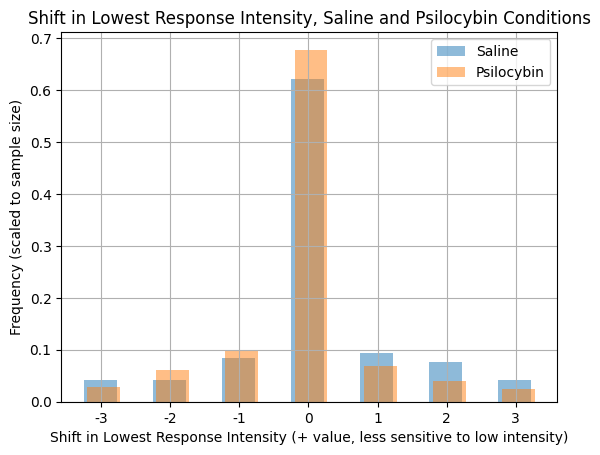

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data1 = diff_lowest_intensity_saline  # First dataset of values between 0 and 4
data2 = diff_lowest_intensity_psilo  # Second dataset of values between 0 and 4

# Calculate histograms for each dataset
hist1, bins1 = np.histogram(data1, bins=7, range=(-3, 3))
hist2, bins2 = np.histogram(data2, bins=7, range=(-3, 3))

# Calculate the total number of samples in each dataset
total_samples1 = len(data1)
total_samples2 = len(data2)

# Scale the frequency to the sample size
scaled_hist1 = hist1 / total_samples1
scaled_hist2 = hist2 / total_samples2

# Calculate the width of each bar
bar_width = (bins1[1] - bins1[0]) / 2

# Add a little space between each pair of bins
space = 0.05

# Create the plot
plt.bar(bins1[:-1] - bar_width * space, scaled_hist1, width=bar_width * (1 - space), alpha=0.5, label='Saline')
plt.bar(bins2[:-1] + bar_width * space, scaled_hist2, width=bar_width * (1 - space), alpha=0.5, label='Psilocybin')

# Set xticks to be in the middle of each pair of bars
plt.xticks(bins1[:-1] - bar_width * space / 2, [-3, -2, -1, 0, 1, 2, 3])

# Add labels and title
plt.xlabel('')
plt.ylabel('Frequency (scaled to sample size)')
plt.title('Shift in Lowest Response Intensity, Saline and Psilocybin Conditions')
plt.xlabel('Shift in Lowest Response Intensity (+ value, less sensitive to low intensity)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [121]:
def count_above_half_max(array):
    max_value = max(array)
    count = 0
    
    # Find the index of the maximum value in the array
    max_index = array.argmax()
    
    # Start from the index of the maximum value and iterate downwards
    index = max_index
    while index >= 0 and array[index] >= max_value / 2:
        count += 1
        index -= 1
    
    # Start from the index of the maximum value and iterate upwards
    index = max_index + 1  # Start from the next index
    while index < len(array) and array[index] >= max_value / 2:
        count += 1
        index += 1
    
    return count

In [176]:
#  Calculating response bandwidth

# Get location of best frequency in array (peak tuning)
# Move down the array and add 1 to a counter (starts at 1) if the response next to it is significant.  Once it is not significant, move back to the BF and go the other way, doing the same.  
# Final count is the total number of responsive frequencies at the BF intensity.  
# Do this for every active cell, or every matched cell, and get the distribution of bandwidths for pre and post saline.  
# For the matched cells, calculate the difference in bandwidth pre- and post. 


def get_bandwidth(coactive,dict_1,dict_2,PRE,POST):

    bandwidth = np.zeros_like(coactive)

    # For each pair of cells in the coactive matrix, extract their tuning curves (i used later).
    for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
                tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']

                # Extract the full row of frequencies, at the intensity where the BF is.
                BF_column_1 = tuning_array_1[:,find_max_column(tuning_array_1)]
                BF_column_2 = tuning_array_2[:,find_max_column(tuning_array_2)]

                bandwidth[i,0] = count_above_half_max(BF_column_1)
                bandwidth[i,1] = count_above_half_max(BF_column_2)

    return bandwidth



In [180]:
percent_shifted_all = []
BF_shift_all = []
pop_sizes = []
PI_shift_all = []
bandwidth_all = []

shift_range = 2

In [197]:


coactive = get_coactive_cells(saline_dict,psilo_dict,PRE,POST)
pop_sizes.append(len(coactive))

percent_shifted_all.append(BF_percent_changed(coactive,shift_range,saline_dict,psilo_dict,PRE,POST))
BF_shift_all.append(get_BF_shifts(coactive,saline_dict,psilo_dict,PRE,POST))
PI_shift_all.append(get_PI_shifts(coactive,saline_dict,psilo_dict,PRE,POST))
lowest_response_intensity_all.append(get_lowest_response_intensity(coactive,saline_dict,psilo_dict,PRE,POST))
bandwidth_all.append(get_bandwidth(coactive,saline_dict,psilo_dict,PRE,POST))

In [198]:
print(percent_shifted_all)
print(pop_sizes)
print(len(bandwidth_all))

[13, 9, 10, 9, 1, 15, 4, 8]
[49, 16, 31, 50, 7, 86, 9, 31]
8


In [199]:
bandwidth_all_con = np.concatenate(bandwidth_all)

In [204]:
np.save(filepath + 'bandwidths_psilocybin',bandwidth_all_con)

(array([[0.88261649, 0.20609319, 0.09856631, 0.03136201, 0.        ,
         0.02240143, 0.        , 0.00448029, 0.        , 0.00448029],
        [0.90949821, 0.17473118, 0.09408602, 0.03136201, 0.        ,
         0.01344086, 0.01344086, 0.00448029, 0.00448029, 0.00448029]]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 2 BarContainer objects>)

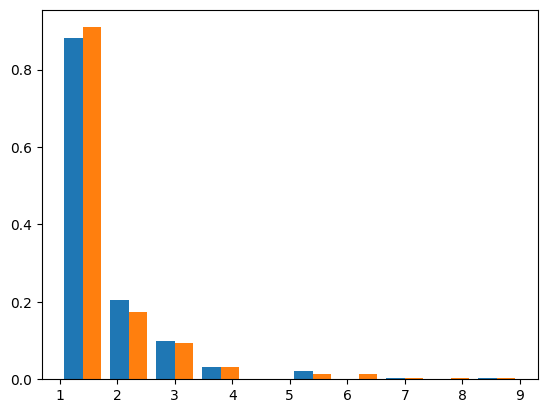

In [206]:
plt.hist(bandwidth_all_con,density=True)

In [208]:
bandwidths_saline = np.load(filepath + 'bandwidths_saline.npy')
bandwidths_psilo = bandwidth_all_con

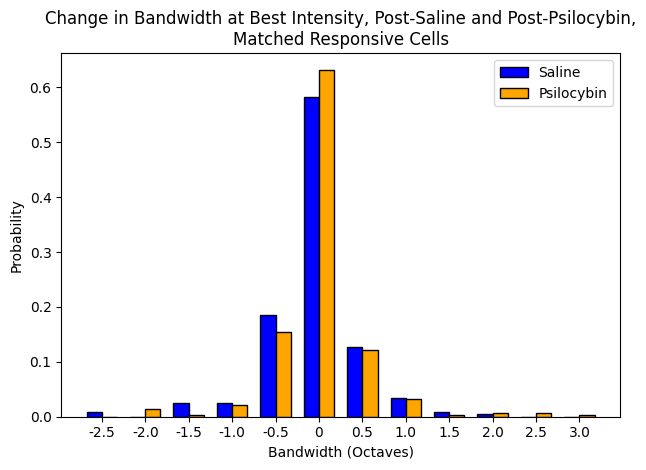

In [269]:
values_set1 = bandwidths_saline[:,1] - bandwidths_saline[:,0]


values_set2 = bandwidths_psilo[:,1] - bandwidths_psilo[:,0]

plot_comparison(values_set1,values_set2)


In [117]:
def get_bandwidth_at_best(dict_1,dict_2,PRE,POST):    
    
    bandwidth_pre = []
    bandwidth_post = []
 
    for cell in dict_1[PRE]:
                if dict_1[PRE][cell]['active'] == True:
                    tuning_array_1 = dict_1[PRE][cell]['peak_tuning']
                    BF_column_1 = tuning_array_1[:,find_max_column(tuning_array_1)]
                    bandwidth_1 = count_above_half_max(BF_column_1)
                    bandwidth_pre.append(bandwidth_1)

    for cell in dict_2[POST]:
                if dict_2[POST][cell]['active'] == True:
                    tuning_array_2 = dict_2[POST][cell]['peak_tuning']
                    BF_column_2 = tuning_array_2[:,find_max_column(tuning_array_2)]
                    bandwidth_2 = count_above_half_max(BF_column_2)
                    bandwidth_post.append(bandwidth_2)

    return bandwidth_pre, bandwidth_post
  

In [236]:
bandwidth_pre_all = []
bandwidth_post_all = []

In [251]:


bandwidth_pre, _ = get_bandwidth_all_cells(saline_dict,psilo_dict,PRE,POST) 
bandwidth_pre_all.append(bandwidth_pre)

_ , bandwidth_post = get_bandwidth_all_cells(saline_dict,psilo_dict,PRE,POST) 
bandwidth_post_all.append(bandwidth_post)




In [252]:
print(len(bandwidth_pre_all))
print(len(bandwidth_post_all))

8
8


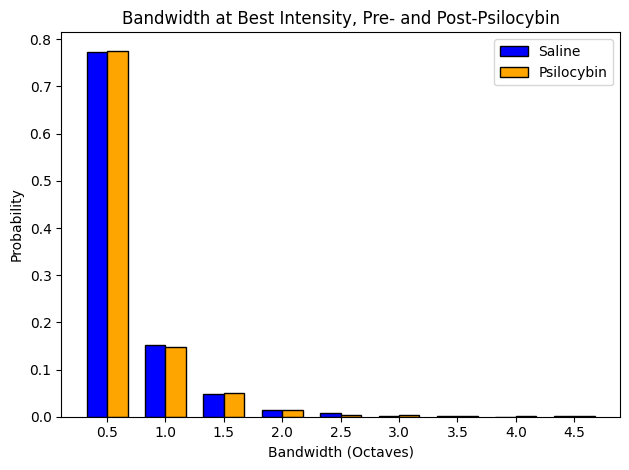

In [256]:
bandwidth_pre_all_con = np.concatenate(bandwidth_pre_all)
bandwidth_post_all_con = np.concatenate(bandwidth_post_all)
plot_comparison(bandwidth_pre_all_con,bandwidth_post_all_con)

In [258]:
bandwidth_all_cells_post_saline = np.load (filepath + 'bandwidth_all_cells_post_saline.npy')
bandwidth_all_cells_post_psilo = bandwidth_post_all_con

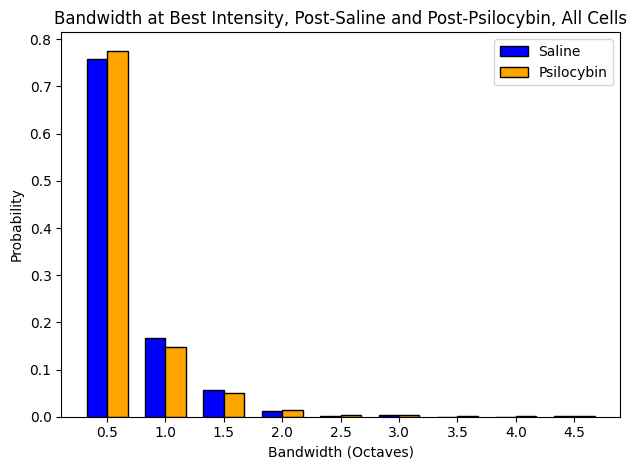

In [262]:
plot_comparison(bandwidth_all_cells_post_saline,bandwidth_all_cells_post_psilo)

In [260]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(bandwidth_all_cells_post_saline, bandwidth_all_cells_post_psilo)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 752815.0
P-value: 0.3877448540104824


In [ ]:
active_1_all = []
active_2_all = []
active_only_pre_all = []
active_only_post_all = []
inactive_all = []
consistently_active_all = []

In [281]:
active_1 = []
active_2 = []
active_only_pre = []
active_only_post = []

matched_cells = psilo_dict[POST][next(iter(psilo_dict[POST]))]['matched_cells']

for cell in saline_dict[PRE]:
            if cell in matched_cells[:,0] and saline_dict[PRE][cell]['active'] == True:
                active_1.append(cell)



In [15]:
def get_activity_info(dict_1,dict_2,PRE,POST):

    matched_responsive_1 = []
    matched_non_responsive_1 = []
    matched_responsive_2 = []
    matched_non_responsive_2 = []

    matched_cells = dict_1[PRE][next(iter(dict_1[PRE]))]['matched_cells']
    matched_cells_2 = dict_2[POST][next(iter(dict_2[POST]))]['matched_cells']

    if len(matched_cells) != len(matched_cells_2):
        print("You have two different matched cells arrays here!")

    for cell in dict_1[PRE]:
            if cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == True:
                matched_responsive_1.append(cell)
            elif cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == False:
                  matched_non_responsive_1.append(cell)

    for cell in dict_2[POST]:
            if cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == True:
                matched_responsive_2.append(cell)
            elif cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == False:
                  matched_non_responsive_2.append(cell)
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_first_only = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_second_only = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    responsive_both = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    non_responsive = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]

    total_matched_cells = len(matched_cells)
    print(total_matched_cells)

    total_responsive_both = len(responsive_both)
    total_responsive_first_only = len(responsive_first_only)
    total_responsive_second_only = len(responsive_second_only)
    total_non_responsive = len(non_responsive)

    if total_matched_cells == total_responsive_both + total_responsive_first_only + total_responsive_second_only + total_non_responsive:
        print("The lengths add up correctly.")
    else:
        print("The lengths do not add up correctly.")


    return responsive_both, responsive_first_only, responsive_second_only, non_responsive,matched_responsive_1,matched_responsive_2

In [16]:
responsive_both_all = []
responsive_first_only_all = []
responsive_second_only_all = []
non_responsive_all = []
matched_active_1_all = []
matched_active_2_all = []

In [31]:
PRE = 'saline_474'
POST = 'psilo_474'

# Call the function once
result = get_activity_info(saline_dict, psilo_dict, PRE, POST)

# Extract the outputs
responsive_both, responsive_first_only, responsive_second_only, non_responsive, matched_active_1, matched_active_2 = result

# Append to respective arrays
responsive_both_all.append(responsive_both)
responsive_first_only_all.append(responsive_first_only)
responsive_second_only_all.append(responsive_second_only)
non_responsive_all.append(non_responsive)
matched_active_1_all.append(matched_active_1)
matched_active_2_all.append(matched_active_2)

117
The lengths add up correctly.


In [32]:
responsive_both_con = np.concatenate(responsive_both_all)
print(responsive_both_con.shape)

responsive_first_only_con = np.concatenate(responsive_first_only_all)
print(responsive_first_only_con.shape)

responsive_second_only_con = np.concatenate(responsive_second_only_all)
print(responsive_second_only_con.shape)

non_responsive_con = np.concatenate(non_responsive_all)
print(non_responsive_con.shape)

matched_active_1_con = np.concatenate(matched_active_1_all)
print(len(matched_active_1_con))

matched_active_2_con = np.concatenate(matched_active_2_all)
print(len(matched_active_2_con))

(279, 2)
(231, 2)
(215, 2)
(967, 2)
510
494


In [33]:
total_cells = sum(len(arr) for arr in [responsive_both_con, responsive_first_only_con, responsive_second_only_con, non_responsive_con])

print(total_cells)

1692


In [115]:
perc_responsive_both = len(responsive_both_con)/total_cells * 100

print(perc_responsive_both)

perc_responsive_first_only = len(responsive_first_only_con)/total_cells * 100

print(perc_responsive_first_only)

perc_responsive_second_only = len(responsive_second_only_con)/total_cells * 100

print(perc_responsive_second_only)

perc_non_responsive = len(non_responsive_con)/total_cells * 100

print(perc_non_responsive)

16.48936170212766
13.652482269503546
12.706855791962173
57.15130023640662


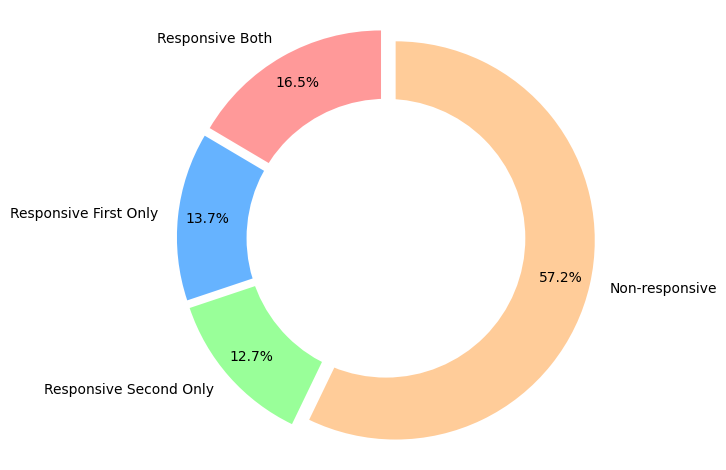

In [116]:
# Pie chart
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [perc_responsive_both,perc_responsive_first_only, perc_responsive_second_only, perc_non_responsive]
# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Adjust aspect ratio to make the sections of the donut plot equal
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
plt.show()

In [118]:
def get_bandwidth_all_cells(dict_1,dict_2,PRE,POST,intensity):    
    
    bandwidth_pre = []
    bandwidth_post = []
 
    for cell in dict_1[PRE]:
                if dict_1[PRE][cell]['active'] == True:
                    tuning_array_1 = dict_1[PRE][cell]['peak_tuning']
                    BF_column_1 = tuning_array_1[:,intensity]
                    if any(value >= z_thresh for value in BF_column_1):
                        bandwidth_1 = count_above_half_max(BF_column_1)
                        bandwidth_pre.append(bandwidth_1)

    for cell in dict_2[POST]:
                if dict_2[POST][cell]['active'] == True:
                    tuning_array_2 = dict_2[POST][cell]['peak_tuning']
                    BF_column_2 = tuning_array_2[:,intensity]
                    if any(value >= z_thresh for value in BF_column_2):
                        bandwidth_2 = count_above_half_max(BF_column_2)
                        bandwidth_post.append(bandwidth_2)
                        print(cell)

    return bandwidth_pre, bandwidth_post

In [148]:
bandwidth_50_pre_all = []
bandwidth_50_post_all = []

In [156]:
PRE = 'saline_474'
POST = 'psilo_474'

result = get_bandwidth_all_cells(saline_dict,psilo_dict,PRE,POST,1)

bandwidth_pre,bandwidth_post = result

bandwidth_50_pre_all.append(bandwidth_pre)
bandwidth_50_post_all.append(bandwidth_post)

print(len(bandwidth_50_pre_all))

2
12
30
40
47
57
62
69
70
72
82
97
110
111
114
115
120
124
135
139
142
143
159
164
165
177
191
197
222
230
246
256
262
263
282
299
301
304
310
315
332
344
384
395
418
420
434
440
461
494
499
515
520
590
655
664
722
820
845
855
861
883
931
994
8


In [157]:
bandwidth_50_pre_con = np.concatenate(bandwidth_50_pre_all)
bandwidth_50_post_con = np.concatenate(bandwidth_50_post_all)

print(len(bandwidth_50_pre_con))
print(len(bandwidth_50_post_con))

334
332


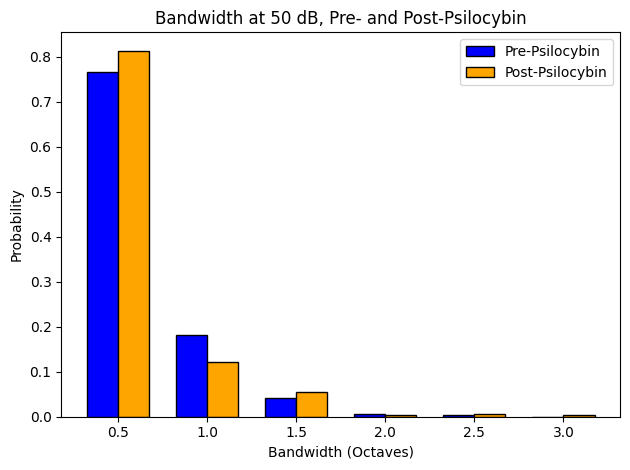

In [162]:
plot_comparison(bandwidth_50_pre_con,bandwidth_50_post_con)

In [159]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(bandwidth_50_pre_con, bandwidth_50_post_con)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 57703.0
P-value: 0.19993890509085954


In [160]:
np.save(filepath + 'bandwidth_50_psilo_pre_allcells',bandwidth_50_pre_con)
np.save(filepath + 'bandwidth_50_psilo_post_allcells',bandwidth_50_post_con)

In [163]:
saline_50_dB = np.load(filepath + 'bandwidth_50_saline_post_allcells.npy')

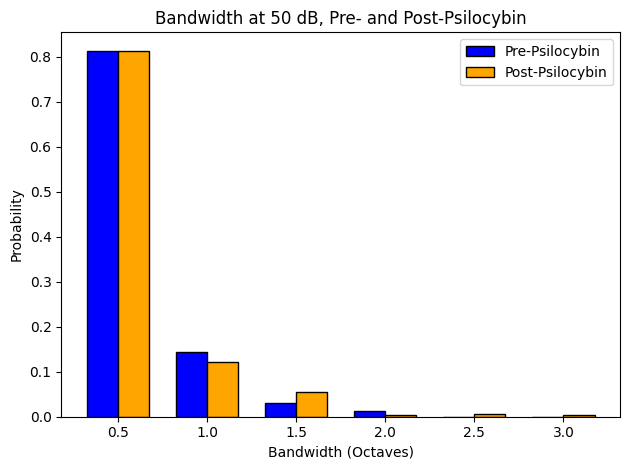

In [164]:
plot_comparison(saline_50_dB,bandwidth_50_post_con)

In [165]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(saline_50_dB, bandwidth_50_post_con)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 53909.0
P-value: 0.9006257358346359


In [ ]:
# Change in BF matched cells:


def get_BF_shifts(dict_pre,dict_post,intensity):

    BF_shift_all = []

    for sub_dict_pre, sub_dict_post in zip(dict_pre.keys(),dict_post.keys()):

        coactive = get_coactive_cells(dict_pre,dict_post,sub_dict_pre,sub_dict_post)

        BF_shift_array = np.zeros_like(coactive[:,0])

        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
            tuning_array_pre = dict_pre[sub_dict_pre][cell_1]['peak_tuning']
            tuning_array_post = dict_post[sub_dict_post][cell_2]['peak_tuning']

            BF_pre = tuning_array_pre[:,intensity]

            BF_post = tuning_array_post[:,intensity]

            max_value_index1 = np.argmax(BF_pre)

            max_value_index2 = np.argmax(BF_post)

            BF_shift = max_value_index1 - max_value_index2

            BF_shift_array[i] = BF_shift
        
        BF_shift_all.append(BF_shift_array)

    BF_shift_all = np.concatenate(BF_shift_all)

    return BF_shift_all